In [1]:
%load_ext autoreload
%autoreload 2

In [2]:
from statesim.model.statespace import (
    Linear,
    Nonlinear,
)
from statesim.simulator import (
    ContinuousSimulator,
    DiscreteSimulator,
    SimulationData,
)
from statesim.analysis.plot_simulation_results import plot_comparison
from statesim.system.cartpole import CartPole
import numpy as np
from statesim.io import read_measurement_csv
import os

In [3]:
T = 10.0
step_size = 0.01
x_bar = np.array([[0], [0], [np.pi], [0]])
x0 = np.array([[0], [0], [np.pi + 0.1], [0]])
sim = ContinuousSimulator(T=T, step_size=step_size)
sim_d = DiscreteSimulator(T=T, step_size=step_size)
sys = CartPole(mu_p=0.01)
A_sym, B_sym = sys.get_linearization()
A, B = sys.evaluate_linearization(
    A_sym=A_sym, B_sym=B_sym, x_bar=x_bar, u_bar=np.array([[0]])
)

In [4]:
lin_model = Linear(A=A, B=B, C=np.array([[0, 0, 1, 0]]), D=np.array([[0]]))
lin_d_model = Linear(
    A=A * step_size + np.eye(sys.nx),
    B=B * step_size,
    C=np.array([[0, 0, 1, 0]]),
    D=np.array([[0]]),
)
nonlin_model = Nonlinear(
    f=sys.state_dynamics,
    g=sys.output_function,
    nx=sys.nx,
    nu=sys.nu,
    ny=sys.ny,
)

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


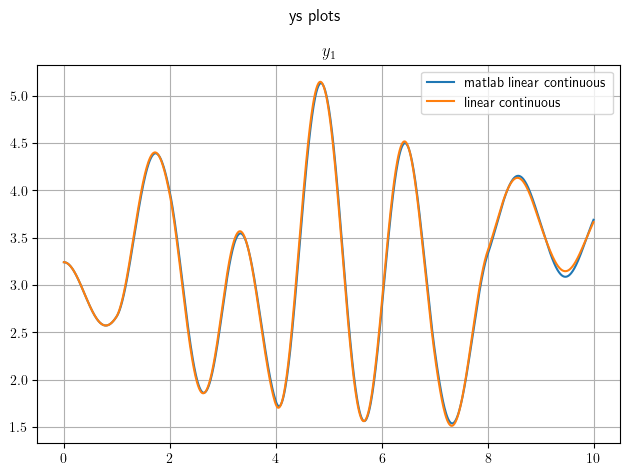

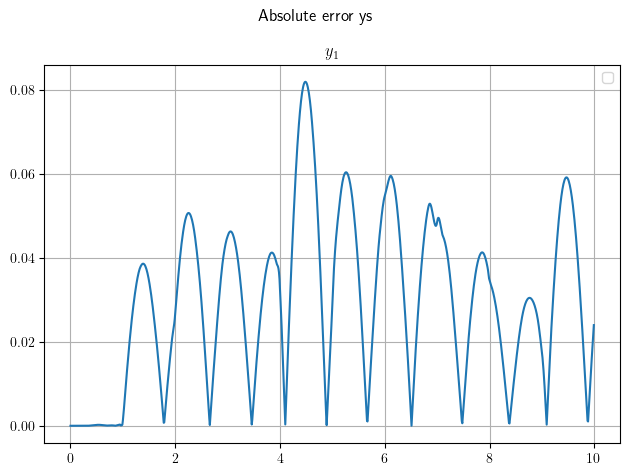

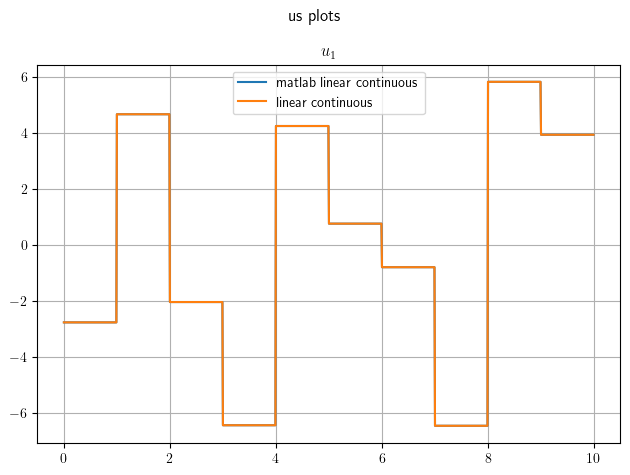

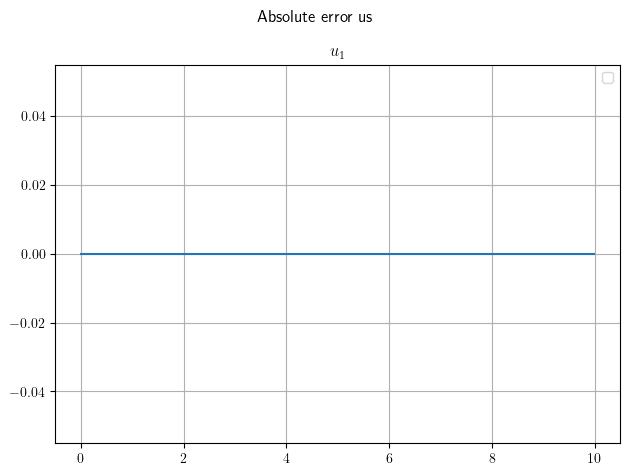

In [5]:
filepath = '../tests/data/2023_03_09-07_56_08_cartpole_linear_continous.csv'
m = read_measurement_csv(filepath=filepath)
m_result = SimulationData(
    xs=[np.array([[x]]) for x in np.zeros(shape=(int(T / step_size), 1))],
    ys=m.ys,
    us=m.us,
    t=m.t,
    name='matlab linear continuous',
)
result = sim.simulate(
    model=lin_model,
    initial_state=x0,
    input=m.us,
    name='linear continuous',
    x_bar=x_bar,
)
plot_comparison(results=[m_result, result], type='ys')
plot_comparison(results=[m_result, result], type='us')

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


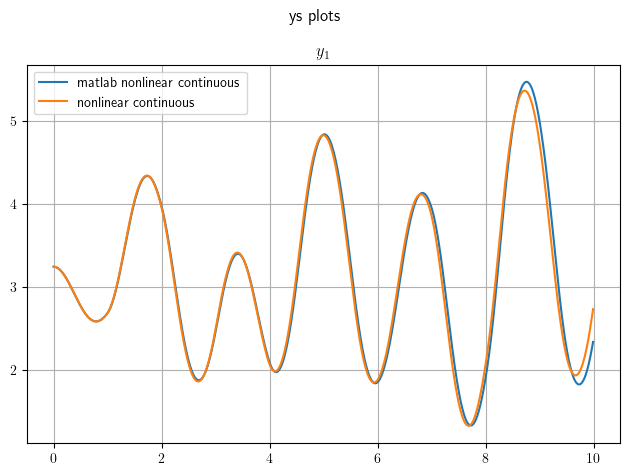

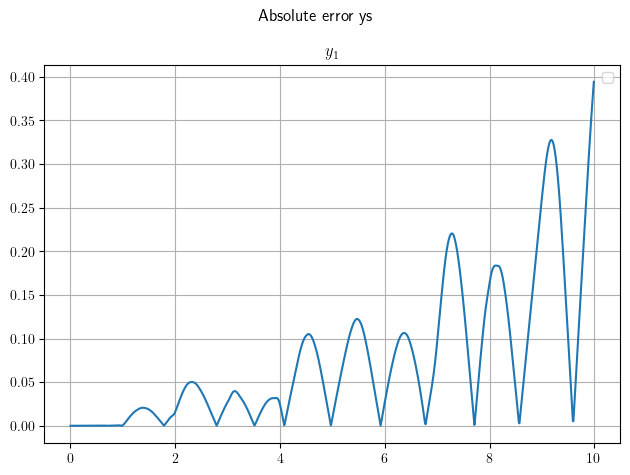

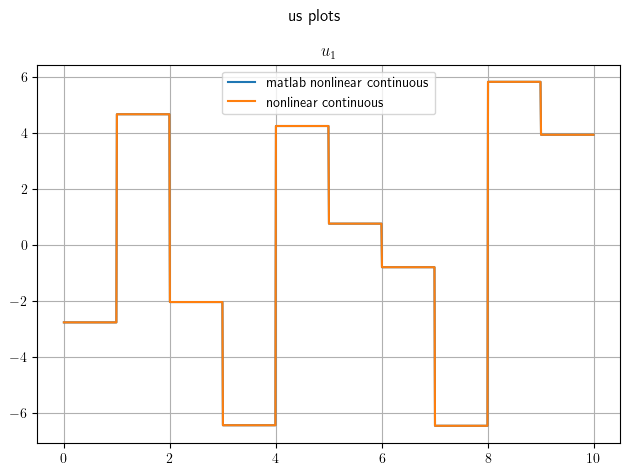

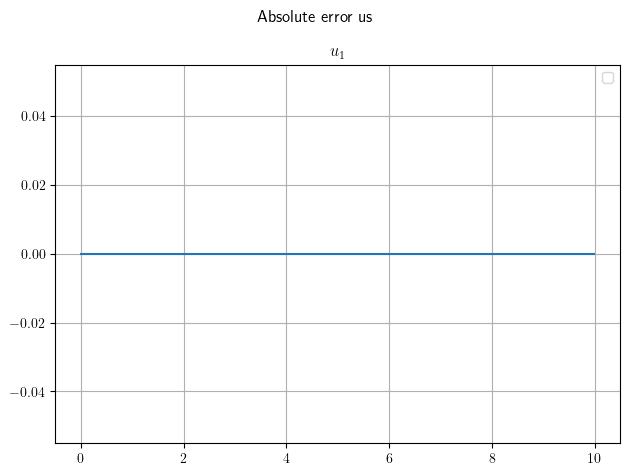

In [6]:
filepath = (
    '../tests/data/2023_03_09-07_56_08_cartpole_nonlinear_continuous.csv'
)
m = read_measurement_csv(filepath=filepath)
m_result = SimulationData(
    xs=[np.array([[x]]) for x in np.zeros(shape=(int(T / step_size), 1))],
    ys=m.ys,
    us=m.us,
    t=m.t,
    name='matlab nonlinear continuous',
)
result, _ = sim.simulate(
    model=nonlin_model,
    initial_state=x0,
    input=m.us,
    name='nonlinear continuous',
)
plot_comparison(results=[m_result, result], type='ys')
plot_comparison(results=[m_result, result], type='us')

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


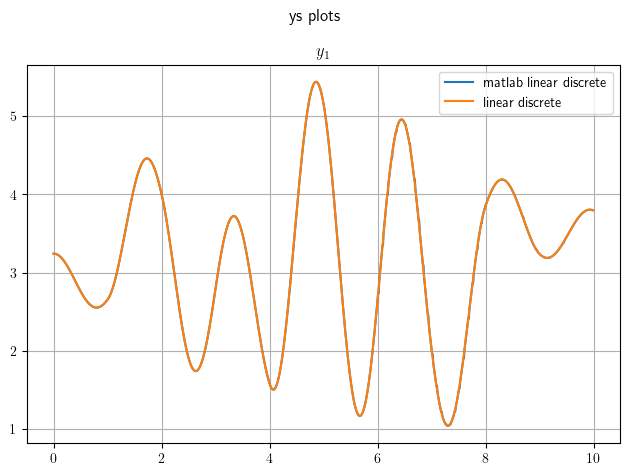

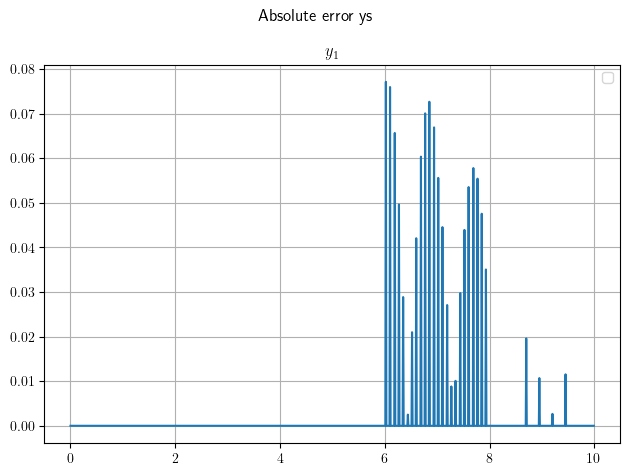

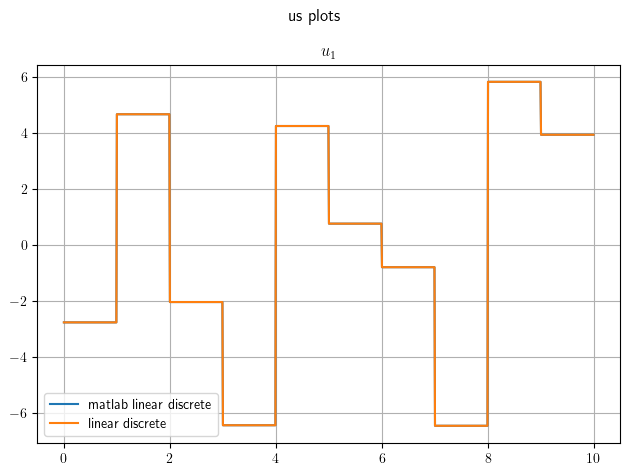

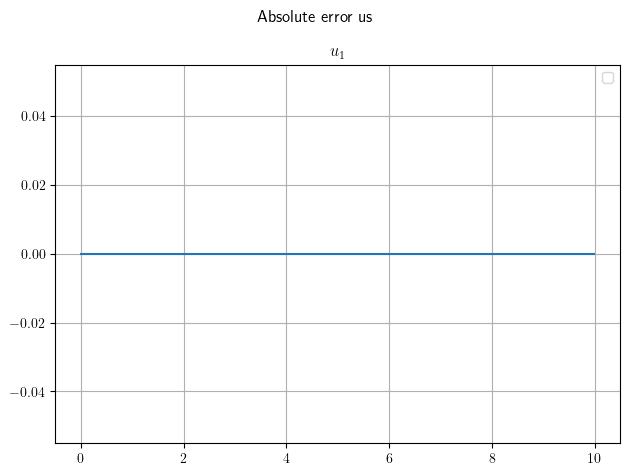

In [7]:
filepath = '../tests/data/2023_03_09-07_56_08_cartpole_linear_discrete.csv'
m = read_measurement_csv(filepath=filepath)
m_result = SimulationData(
    xs=[np.array([[x]]) for x in np.zeros(shape=(int(T / step_size), 1))],
    ys=m.ys,
    us=m.us,
    t=m.t,
    name='matlab linear discrete',
)
result = sim_d.simulate(
    model=lin_d_model,
    initial_state=x0,
    input=m.us,
    name='linear discrete',
    x_bar=x_bar,
)
plot_comparison(results=[m_result, result], type='ys')
plot_comparison(results=[m_result, result], type='us')